# Dimensionality Reduction

* Curse of Dimensionality
* Dimensionality Reduction Approaches
    * Projection
    * Manifolds
* Dimensionality Reduction Techniques
    * PCA
    * Kernel PCA
    

### Curse of Dimensionality
As the dimensions increase, the chances of being on the edge increases.

In [ ]:
# Area of the edge 1m
1 - (0.998)**2

0.0039959999999999996

In [ ]:
# Volume of the edge 1m
1 - (0.998)**3

0.005988007999999989

In [ ]:
# and for 10000 dimensions
1 - (0.998)**10000

0.999999997979714

In [ ]:
import numpy as np
import numpy.random as rnd

### Dimension Reduction Approaches: Projection

* Most dataset features are concentrated in a few dimensions - not uniformly across all. Much learnable training can be found in low-D subspace.

#### Build a 3D dataset
+  to generate and manipulate a dataset in three dimensions, reduce its dimensionality to two dimensions using Principal Component Analysis (PCA), and then recover the 3D points projected onto a 2D plane.



In [ ]:
rnd.seed(4)
m = 60 # No of instances
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * rnd.randn(m)

# mean-normalize the data
X = X - X.mean(axis=0)

# apply PCA -(projection-based dimension reduction technique) to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #n_components denote the number of axes the dataset has to be reduced to
X2D = pca.fit_transform(X)

# recover 3D points projected on 2D plane
X2D_inv = pca.inverse_transform(X2D)

#### Utility to draw 3D

In [ ]:

# express plane as function of x,y
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_ #principal components obtained from PCA.
R = C.T.dot(C) #the dot product of the transpose of C and C, which represents the rotation matrix from the original 3D space to the 2D plane.
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2]) #the plane in terms of x1 and x2. It's calculated by taking the dot product of the components of the plane's normal vector with x1 and x2, and then dividing by (1 - R[2, 2]). This equation defines the z-coordinate of points on the plane based on their x1 and x2 coordinates.

#### plot 3D dataset, plane & projections

<ipython-input-6-2972973afe6d>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X[i][0], X2D_inv[i][0]], [X[i][1], X2D_inv[i][1]], [X[i][2], X2D_inv[i][2]], "k-", color="#505050")


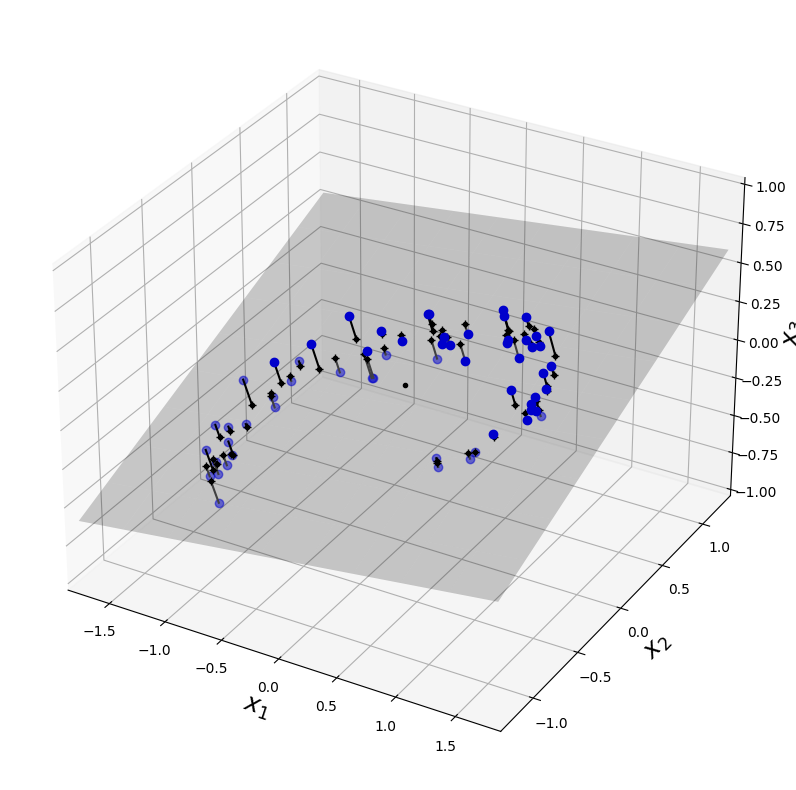

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


X3D_above = X[X[:, 2] > X2D_inv[:, 2].mean()]  # Adjusted the condition to use the mean of X2D_inv
X3D_below = X[X[:, 2] <= X2D_inv[:, 2].mean()]  # Adjusted the condition to use the mean of X2D_inv



ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5) # plotting the ones below the identified plane

ax.plot_surface(x1, x2, z, alpha=0.2, color="k") # plotting the identified plane
np.linalg.norm(C, axis=0)


ax.plot([0], [0], [0], "k.")

for i in range(min(m, X2D_inv.shape[0])):
    if X[i, 2] > X2D_inv[i, 2]:
       ax.plot([X[i][0], X2D_inv[i][0]], [X[i][1], X2D_inv[i][1]], [X[i][2], X2D_inv[i][2]], "k-")
    else:
       ax.plot([X[i][0], X2D_inv[i][0]], [X[i][1], X2D_inv[i][1]], [X[i][2], X2D_inv[i][2]], "k-", color="#505050")




ax.plot(X2D_inv[:, 0], X2D_inv[:, 1], X2D_inv[:, 2], "k+") # Plotting the projections
ax.plot(X2D_inv[:, 0], X2D_inv[:, 1], X2D_inv[:, 2], "k.") # Plotting the projections
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo") # Plotting the instances above the identified plane
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])



#save_fig("dataset_3d_plot")
plt.show()

#### Plot 2D projection equivalent:

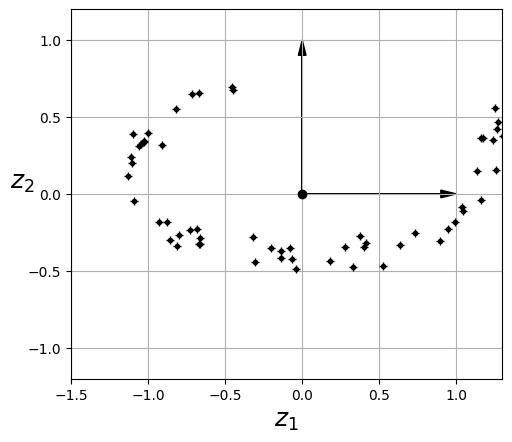

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "k+") # plotting the projections
ax.plot(X2D[:, 0], X2D[:, 1], "k.") # plotting the projections
ax.plot([0], [0], "ko") # Plotting the origin
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the z1 arrow
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the z2 arrow
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
plt.show()

### Projection for Swiss roll

In [ ]:
from sklearn.datasets import make_swiss_roll
help(make_swiss_roll)

Help on function make_swiss_roll in module sklearn.datasets._samples_generator:

make_swiss_roll(n_samples=100, *, noise=0.0, random_state=None, hole=False)
    Generate a swiss roll dataset.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, default=100
        The number of sample points on the Swiss Roll.
    
    noise : float, default=0.0
        The standard deviation of the gaussian noise.
    
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    hole : bool, default=False
        If True generates the swiss roll with hole dataset.
    
    Returns
    -------
    X : ndarray of shape (n_samples, 3)
        The points.
    
    t : ndarray of shape (n_samples,)
        The univariate position of the samp

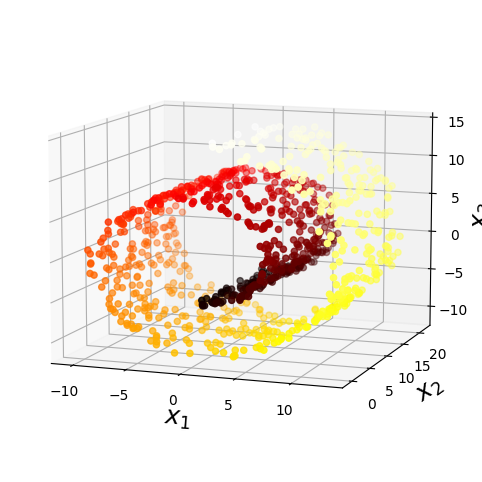

In [ ]:
# Swiss roll visualization:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# cmap chooses the color map
# color of the indexes are set based on the univariate position of the instance
# a univariate position based on the main axis (which is along the swiss roll plane)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [ ]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


The scikit-learn library provides the TruncatedSVD class implementation of Singular Value Decomposition that can be used as a dimensionality reduction data transform. The “n_components” argument can be set to configure the number of desired dimensions in the output of the transform.

In [ ]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.028)


In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [ ]:
print(X[0:5,:])
print(t[0:5])

[[ 0.08054814  0.82273313 -1.21175254  2.42118403  3.30424321 -6.34357561
  -0.36988562  0.06427717  0.09452105 -4.36442986 -2.94305762  0.50234069
  -2.33914679  0.15303147  0.543728   -0.42052302  1.45612689  2.88260938
   1.79160028 -4.29708787]
 [-2.3302999  -4.86608574 -3.88291317 -2.23248277  1.44515322  2.59739106
   3.68926886 -1.65118858 -2.47865974 -1.71944863  1.73993388 -3.88589606
  -1.44039921  3.12869825 -5.37048832  3.88186485  0.75984387 -0.14561581
  -0.55489384  0.61420772]
 [-1.19714954  1.5556314  -0.61871573  7.19367388 -3.30037456 -0.03322397
   4.18246247  0.29096261  0.88602211 -0.68523304  2.63121765  1.0153412
   2.4415684   0.93207343 -1.89999629 -3.04973163 -3.17485084  1.73481788
   0.13067403 -3.13351468]
 [ 1.5357694  -0.73349903  0.20454097  0.90799209 -1.14280009 -2.34206371
   2.53389723 -1.14005216  4.23147165  0.03241456  0.61052087  2.09324777
  -2.80046662 -2.09333975  1.10282043  1.38599033 -0.47639479  3.0551349
   1.76445556 -1.13242379]
 [ 1.9

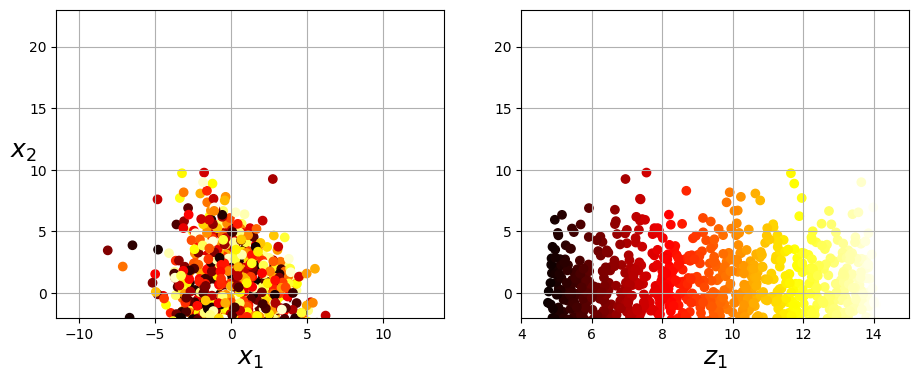

In [ ]:
# "squashed" swiss roll visualization:
# Projecting on x1 and x2
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

# Plotting x2 versus the univariate label
# hence, the coloring is linear in the second curve and changes with the univariate label
plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

### Approaches: Manifolds
* Manifolds = shapes that can be bent/twisted in higher-D space.
* ex: "Swiss roll" problem

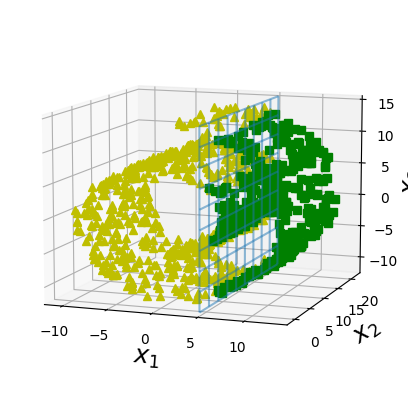

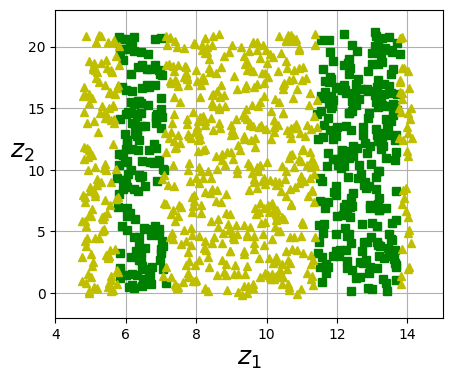

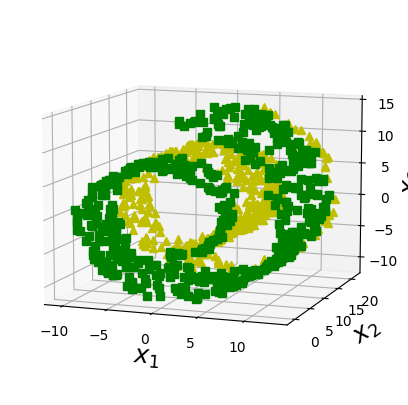

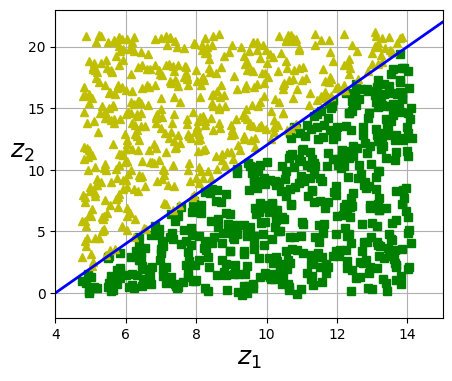

In [ ]:
from matplotlib import gridspec

# Plotting the axes
axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

# X contains the make_swiss_swiss roll data
# Defining Case 1
positive_class = X[:, 0] > 5 # Potive class x1 > 5 for case 1
X_pos = X[positive_class]
X_neg = X[~positive_class]

# Plotting Case 1
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

# Plotting x2 versus t (univariate variable along the rolled plane)
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.plot(t[positive_class], X[positive_class, 1], "gs") # plotting the positive class
plt.plot(t[~positive_class], X[~positive_class, 1], "y^") # plotting the negative class
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# defining case 2 where the decision boundary is a function of the univariate vvariable t
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')
positive_class = 2 * (t[:] - 4) > X[:, 1] # defining the postive class as a function of univariate variable t
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^") # plotting the positive class
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs") # plotting the negative class
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Lesson learned (below):
# Unrolling a dataset to a lower dimension doesn't necessarily lead to
# a simpler representation.

#### Switch back to the slides

### PCA (Principal Component Analysis)
Most popular projection-baed dimensionality reduction algorithm
* Finds hyperplane that lies closest to the data
* Project data onto the hyperplane

### Preserving Variance
* Below: simple 2D dataset projected onto 3 different axes.
* Projection on solid line preserves the maximum variance. (Therefore less likely to lose information.)

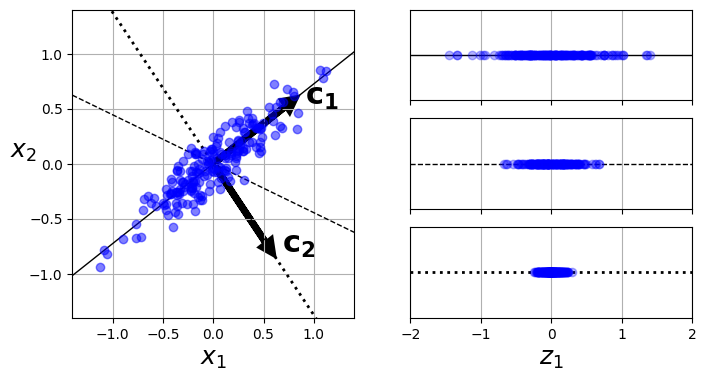

In [ ]:
angle = np.pi / 5 # defining an angle of 36 degrees
stretch = 5
m = 200

rnd.seed(3)
X = rnd.randn(m, 2) / 10 # Generating 200 * 2 normalized random numbers in the range and strething it 5 times along the x axis
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretching by multpliying thr x1 axis by 5 times
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # projection along 36 degrees and 54 degrees

u1 = np.array([np.cos(angle), np.sin(angle)]) # array to rotate a an array by 36 degrees
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)]) # array to rotate an array by -24 degrees
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)]) # array to rotate an array by -54 degrees

X_proj1 = X.dot(u1.reshape(-1, 1)) # projection along 36 degrees angle
X_proj2 = X.dot(u2.reshape(-1, 1)) # projection along -24 degrees angle
X_proj3 = X.dot(u3.reshape(-1, 1)) # projection along -54 degrees angle

# Plotting the dataset, the hyperplanes,
plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1) # plotting hyper plane 1
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1) # plotting hyper plane 2
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2) # plotting hyper plane 3
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5) # Plotting the datasets
plt.axis([-1.4, 1.4, -1.4, 1.4]) # Making the axis
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the unit vector along first hyperplane
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the unit vector along third hyperplane
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

# PLotting the projections along the hyperplanes
## Projection 1
plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

## Projection 2
plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

## Projection 3
plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

# **PCA ON IRIS DATASET**

## upload all the necessary files.
1.  **numpy :** it is used for numerical operations in Python.
2. **pandas** : for data manipulation and analysis.
3. **sklearn.decomposition  PCA**: Import the PCA class from scikit-learn for performing Principal Component Analysis.
4. **matplotlib**: Import the matplotlib library for creating plots and visualizations.
5. **seaborn**: Import the seaborn library for improved data visualization.
6. **train_test_split**:  to split the dataset into training and testing sets.
7. **DecisionTreeClassifier**: for building a decision tree model.
8. **classification_report, accuracy_score, confusion_matrix**: Import metrics for evaluating the classifier's performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# **upload the iris dataset**
** Load the Iris dataset into the digits variable.**

In [ ]:
from sklearn.datasets import load_iris
digits = load_iris()

**Create a DataFrame named data1 containing the features of the Iris dataset.**

In [ ]:
data1=pd.DataFrame(digits.data)

**1. Assign the features to the x variable.**
**2. Assign the target labels to the y variable.**

In [ ]:
x=digits.data
y=digits.target

**size of the IRIS dataset**

In [ ]:

x.shape

(150, 4)

In [ ]:
y.shape

(150,)

**Standardize the features using 'StandardScaler'.**


In [ ]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
X_std = StandardScaler().fit_transform(x)

**The mean vector and covariance matrix for the standardized features.**
**eigenvalues and eigenvectors from the covariance matrix.**

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

**Create a list of eigenvalue-eigenvector pairs and sort them in descending order of eigenvalues.**

In [ ]:

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

**Calculate individual explained variance and cumulative explained variance from eigenvalues.**

In [ ]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

**Create a bar plot of individual and cumulative explained variance.**

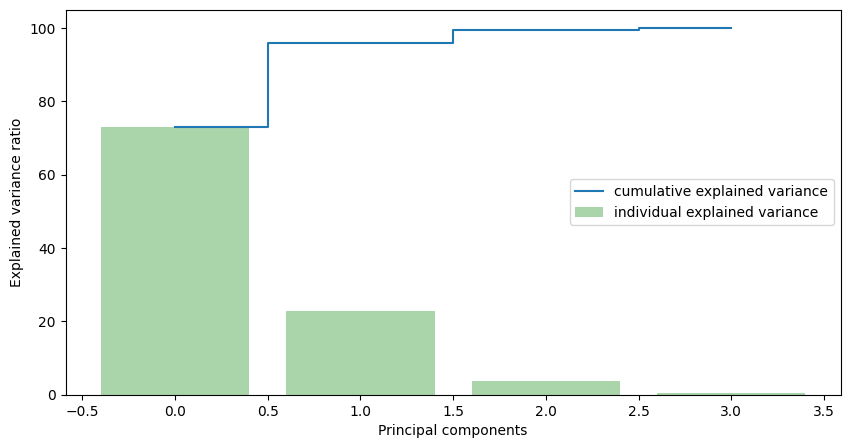

In [ ]:

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

**Split the data into training and testing sets using** **train_test_split**.

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(X_std,y)

**Create a PCA object with n_components set to 3 and transform the training and testing data using PCA.**

In [ ]:
pca = PCA(n_components=2)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

**Create a Decision Tree classifier (rf) and fit it to the PCA-transformed training data.**

In [ ]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)

**Predict the labels using the classifier on the PCA-transformed testing data.**

In [ ]:
predicted=rf.predict(pca_x_test)

**The accuracy score of the predicted labels.**

In [ ]:
accuracy_score(predicted,y_test)

0.868421052631579

**Set the expected variable to the true labels of the testing data.**

In [ ]:
expected=y_test

**Create a figure for plotting with specified dimensions and adjustments**
**Create a scatter plot to visualize the predicted and actual classes using PCA components**


<Figure size 600x600 with 0 Axes>

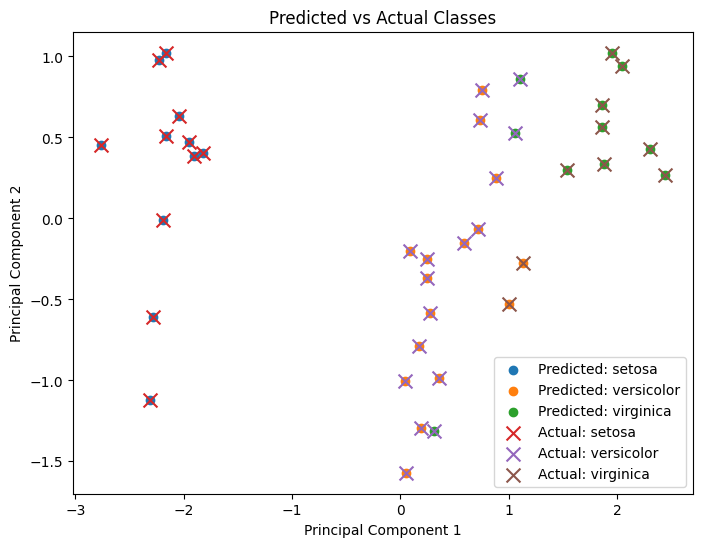

In [ ]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the prediction
plt.figure(figsize=(8, 6))

# Plot points colored by predicted class
for target, target_name in enumerate(digits.target_names):
    plt.scatter(pca_x_test[predicted == target, 0], pca_x_test[predicted == target, 1],
                label=f'Predicted: {target_name}')

# Plot actual classes as markers
for target, target_name in enumerate(digits.target_names):
    plt.scatter(pca_x_test[expected == target, 0], pca_x_test[expected == target, 1],
                marker='x', s=100, label=f'Actual: {target_name}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Predicted vs Actual Classes')
plt.legend()
plt.show()


### PCA for Compression
* Example applying PCA to MNIST dataset with 95% preservation = results in ~150 features (original = 28x28 = 784)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


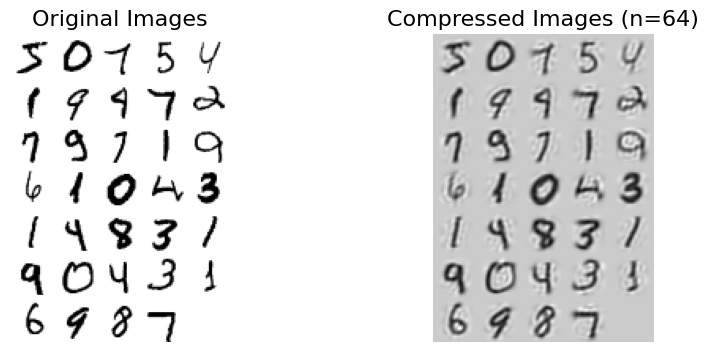

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.uint8)
y = mnist.target.astype(np.uint8)

# Rescale pixel values to the range [0, 1]
X = X / 255.0

# Define the number of principal components to keep (compression factor)
n_components = 64  # Adjust this number as needed

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Inverse transform to recover compressed images
X_reconstructed = pca.inverse_transform(X_pca)

# Function to plot MNIST digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis("off")

# Plot original and compressed images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_digits(X[::2100])
plt.title("Original Images", fontsize=16)
plt.subplot(1, 2, 2)
plot_digits(X_reconstructed[::2100])
plt.title(f"Compressed Images (n={n_components})", fontsize=16)
plt.show()


### Decompression of dataset using inverse transform

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


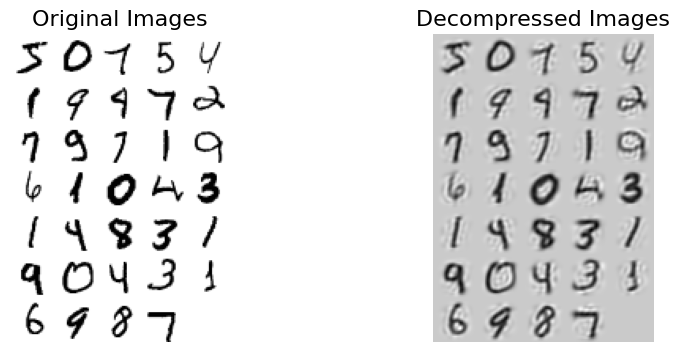

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.uint8)
y = mnist.target.astype(np.uint8)

# Rescale pixel values to the range [0, 1]
X = X / 255.0

# Define the number of principal components to keep (compression factor)
n_components = 64  # Adjust this number as needed

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Inverse transform to recover the compressed data
X_reconstructed = pca.inverse_transform(X_pca)

# Function to plot MNIST digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis("off")

# Plot original and decompressed images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_digits(X[::2100])
plt.title("Original Images", fontsize=16)
plt.subplot(1, 2, 2)
plot_digits(X_reconstructed[::2100])
plt.title(f"Decompressed Images", fontsize=16)
plt.show()
